In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report,confusion_matrix,f1_score
import xgboost as xgb
from xgboost import XGBClassifier

In [5]:
data=pd.read_csv('ELECTION DATASET.csv')

In [6]:
df=data.copy()

In [7]:
df=df.sort_values(by='STATE')

In [8]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [9]:
df.shape

(2263, 19)

In [10]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,Hand,MALE,0,52.0,GENERAL,Graduate Professional,"Rs 13,22,33,012\n ~ 13 Crore+","Rs 8,04,50,870\n ~ 8 Crore+",95249,59,95308,29.926744,45.954156,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,Lotus,MALE,1,46.0,GENERAL,Graduate Professional,"Rs 8,51,40,573\n ~ 8 Crore+","Rs 46,33,914\n ~ 46 Lacs+",93772,129,93901,29.484945,45.275750,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,Helicopter,MALE,0,61.0,GENERAL,Post Graduate,"Rs 1,99,16,000\n ~ 1 Crore+","Rs 13,11,000\n ~ 13 Lacs+",5339,2,5341,1.677076,2.575242,318471
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,Broom,MALE,0,49.0,GENERAL,12th Pass,"Rs 9,98,87,782\n ~ 9 Crore+","Rs 17,91,076\n ~ 17 Lacs+",2837,2,2839,0.891447,1.368866,318471
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,Elephant,MALE,0,43.0,SC,Post Graduate,"Rs 12,50,000\n ~ 12 Lacs+","Rs 2,40,000\n ~ 2 Lacs+",2478,8,2486,0.780605,1.198662,318471


In [12]:
import plotly.express as px
state=df['STATE'].unique()
fig1=px.histogram(df, x='STATE' , y="TOTAL ELECTORS",title ="state wise total_electors")
fig2=px.histogram(df, x='STATE' , y="TOTAL VOTES",title ="state wise total_votes")

fig1.update_layout(height=600, width=800)
fig2.update_layout(height=600, width=800)
fig1.show()
fig2.show()

In [13]:
plot_table=df['GENDER'].value_counts()
fig=px.bar(x=plot_table.index, y=plot_table.values)
fig.update_layout(
    autosize=False,
    width=400,
    height=400,
    xaxis_title=dict(text='Gender', font=dict(size=10, color='#FFFFFF')),
    yaxis_title=dict(text='Count', font=dict(size=10, color='#FFFFFF'))
)
fig.show()

In [14]:
df[df['WINNER']==1]['GENDER'].value_counts()


MALE      463
FEMALE     76
Name: GENDER, dtype: int64

Age    Candidates
55.0    67
52.0    66
58.0    63
48.0    62
46.0    62
61.0    61
44.0    60
59.0    60
43.0    59
56.0    57
Name: AGE, dtype: int64


[Text(0.5, 1.0, 'Age of Winners')]

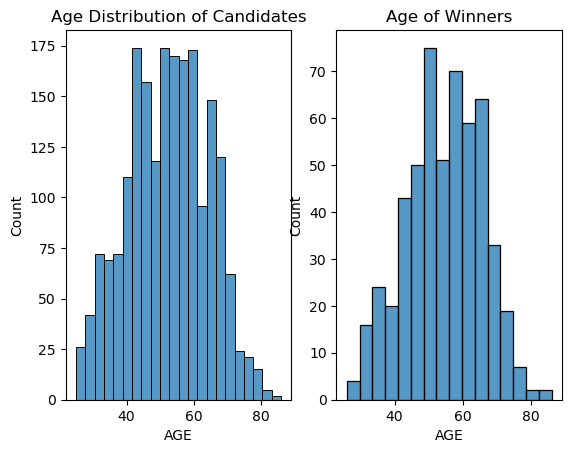

In [15]:
print('Age    Candidates')
print(df['AGE'].value_counts().head(10))
plt.subplot(1,2,1)
sns.histplot(df['AGE']).set(title='Age Distribution of Candidates')
plt.subplot(1,2,2)
sns.histplot(df[df['WINNER']==1]['AGE']).set(title='Age of Winners',)

In [16]:
px.bar(df[df['WINNER']==1], x="AGE", y="TOTAL VOTES",title='Age wise Votes Distribution')

C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_13980\3085317288.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_13980\3085317288.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='TOTAL ELECTORS', ylabel='Density'>

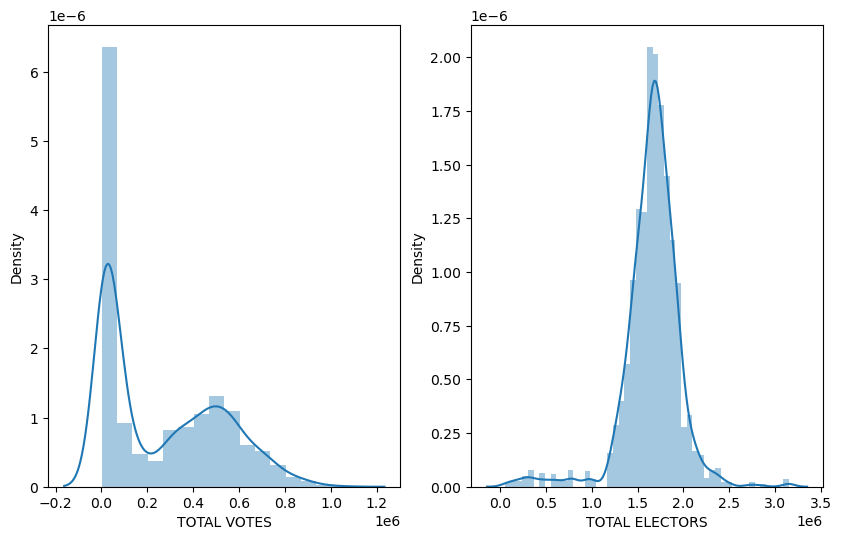

In [17]:
fig=plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['TOTAL VOTES'],)
plt.subplot(1,2,2)
sns.distplot(df['TOTAL ELECTORS'])

[Text(0.5, 1.0, 'BJP Winners in TOP 10 States')]

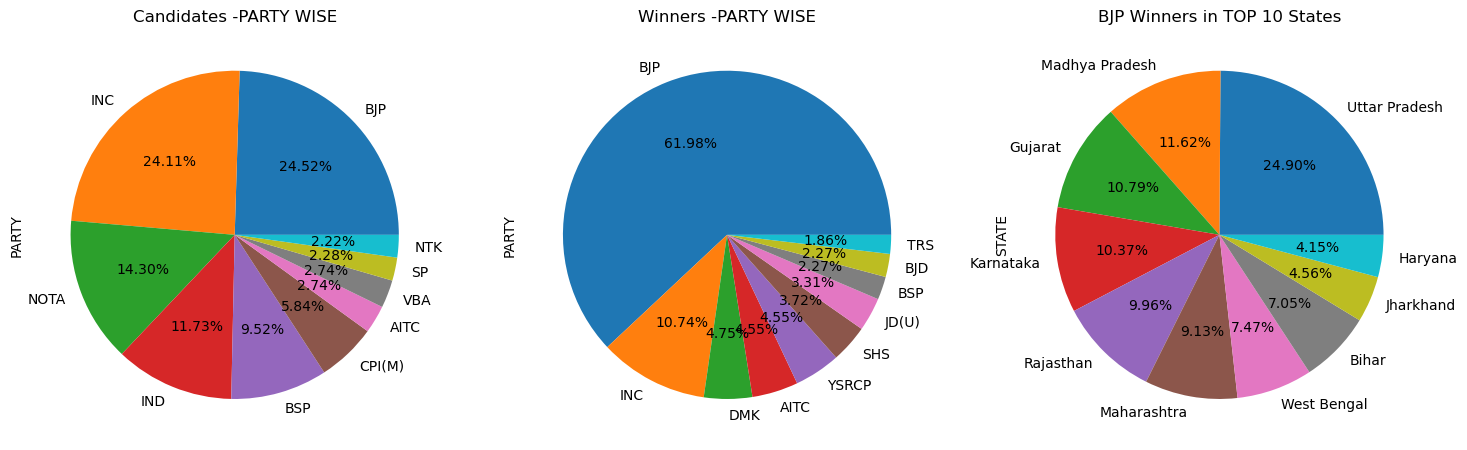

In [18]:
fig=plt.figure(figsize=(18,14))
plt.subplot(1,3,1)
df['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Candidates -PARTY WISE')
plt.subplot(1,3,2)
df[df['WINNER']==1]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners -PARTY WISE')
plt.subplot(1,3,3)
df[(df['WINNER']==1) & (df['PARTY']=='BJP')]['STATE'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='BJP Winners in TOP 10 States')

[Text(0.5, 1.0, 'Winners in Gujarat')]

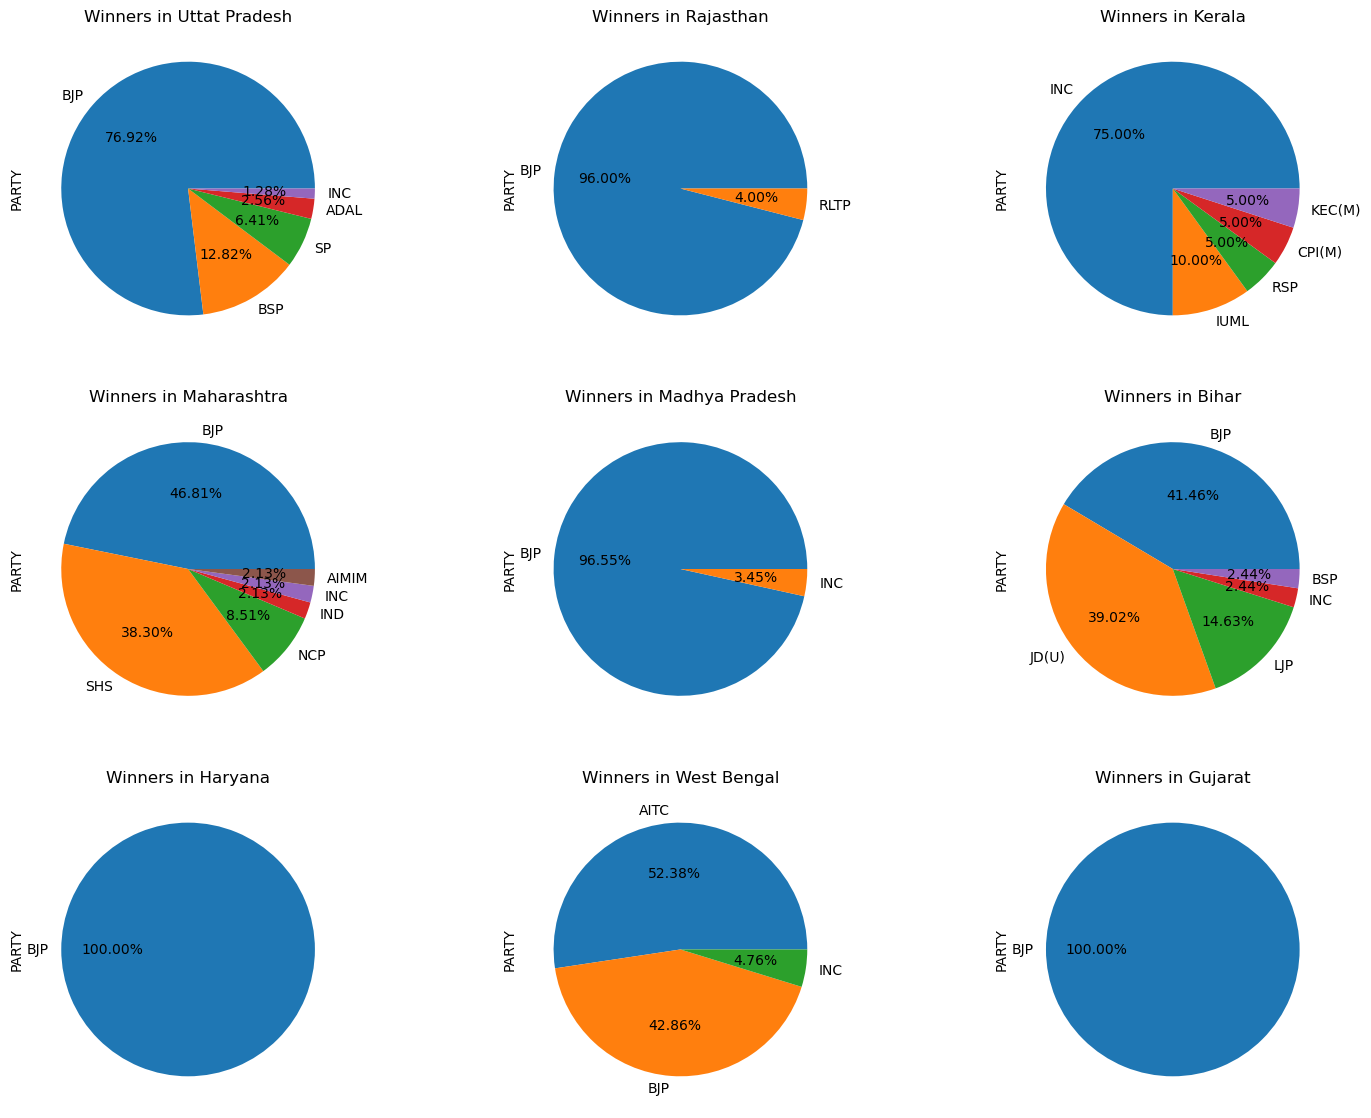

In [19]:
fig=plt.figure(figsize=(18,14))
plt.subplot(3,3,1)
df[(df['WINNER']==1) & (df['STATE']=='Uttar Pradesh')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in Uttat Pradesh')
plt.subplot(3,3,2)
df[(df['WINNER']==1) & (df['STATE']=='Rajasthan')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in Rajasthan')
plt.subplot(3,3,3)
df[(df['WINNER']==1) & (df['STATE']=='Kerala')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in Kerala')
plt.subplot(3,3,4)
df[(df['WINNER']==1) & (df['STATE']=='Maharashtra')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in Maharashtra')
plt.subplot(3,3,5)
df[(df['WINNER']==1) & (df['STATE']=='Madhya Pradesh')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in Madhya Pradesh')
plt.subplot(3,3,6)
df[(df['WINNER']==1) & (df['STATE']=='Bihar')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in Bihar')
plt.subplot(3,3,7)
df[(df['WINNER']==1) & (df['STATE']=='Haryana')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in Haryana')
plt.subplot(3,3,8)
df[(df['WINNER']==1) & (df['STATE']=='West Bengal')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in West Bengal')
plt.subplot(3,3,9)
df[(df['WINNER']==1) & (df['STATE']=='Gujarat')]['PARTY'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%').set(title='Winners in Gujarat')

In [20]:
p1=px.scatter(df[(df['WINNER']==1) & (df['STATE']=='Uttar Pradesh')], x="PARTY", y="TOTAL VOTES", color="GENDER",
                title="Winning Parties vs Total Votes in UTTAR PRADESH")
p1.update_layout(
   width=700,
   height=400
)

In [21]:
from plotly.subplots import make_subplots
fig1=px.histogram(df[df['WINNER']==1], x="CATEGORY",title='Category wise Winners count')
fig1.update_layout(
    autosize=False,
    width=400,
    height=400,)

fig1.show()



[Text(0.5, 1.0, 'Education Wise Winners count')]

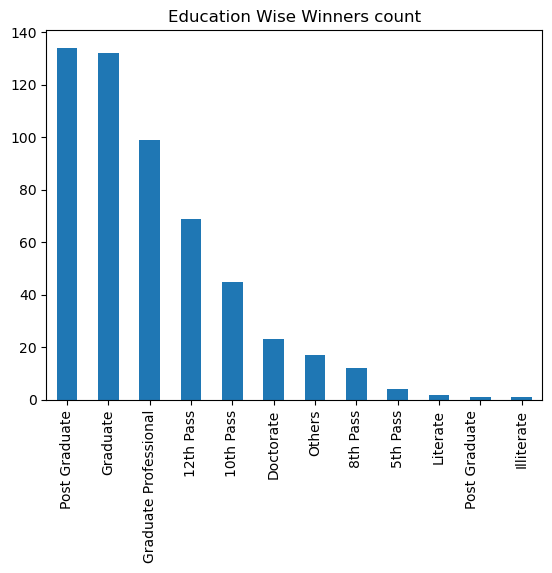

In [22]:
df[df['WINNER']==1]['EDUCATION'].value_counts().plot(kind='bar').set(title='Education Wise Winners count')

In [23]:
df=df.drop(['NAME','SYMBOL','GENERAL VOTES','POSTAL VOTES','OVER TOTAL ELECTORS \nIN CONSTITUENCY','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY','LIABILITIES','TOTAL VOTES'],axis=1)

In [24]:
df.dropna(inplace=True)

In [25]:
df['PARTY'].value_counts()

BJP       420
INC       413
IND       201
BSP       163
CPI(M)    100
         ... 
JDR         1
CPIM        1
JAPL        1
BJKVP       1
MADP        1
Name: PARTY, Length: 132, dtype: int64

In [26]:
df.replace(['PSPL','IND','SBSP', 'CPI(M)','RLD', 'JANADIP', 'RSOSP', 'JDL', 'BRPI', 'BLRP', 'ADAL', 'AIPF','Literate','8th Pass','Others','5th Pass'],'OTHER', inplace=True)

In [27]:
df['CONSTITUENCY']

105    ANDAMAN & NICOBAR ISLANDS
106    ANDAMAN & NICOBAR ISLANDS
107    ANDAMAN & NICOBAR ISLANDS
108    ANDAMAN & NICOBAR ISLANDS
109    ANDAMAN & NICOBAR ISLANDS
                 ...            
454                       BOLPUR
453                       BOLPUR
452                       BOLPUR
603                   DARJEELING
444                    BISHNUPUR
Name: CONSTITUENCY, Length: 2018, dtype: object

In [28]:
df.drop(df[df['EDUCATION'].isin(['Not Available',np.nan])].index, axis=0,inplace=True)

In [29]:
df.reset_index(inplace=True,drop=True)

In [30]:
df['EDUCATION'].unique()

array(['Graduate Professional', 'Post Graduate', '12th Pass', 'Doctorate',
       'Illiterate', '10th Pass', 'Graduate', 'OTHER', 'Post Graduate\n'],
      dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le=LabelEncoder()
le_df=df[['EDUCATION','PARTY']].apply(le.fit_transform)
df=df.drop(['EDUCATION','PARTY'],axis=1)
df=pd.concat([df,le_df],axis=1)

In [32]:
df['EDUCATION'].unique()

array([4, 7, 1, 2, 5, 0, 3, 6, 8])

In [33]:
df['EDUCATION'].value_counts()

7    502
3    441
4    336
1    256
0    196
6    186
2     73
5      5
8      1
Name: EDUCATION, dtype: int64

In [34]:
def encode_age(x):
  if x>25 and x<=35:
    return 0
  elif x>35 and x<=55:
    return 1
  elif x>55 and x<=75:
    return 2
  else:
    return 3

In [35]:
df['AGE']=df['AGE'].apply(encode_age)

In [43]:
df['ASSETS'].replace(['Nil','`'],'Rs 0000000',inplace=True)

In [45]:
df['ASSETS'] = df['ASSETS'].apply(lambda x: x.split('\n')[0].split(' ')[1].replace(',','') if isinstance(x, str) else x).astype('int')

In [46]:
print(df['ASSETS'].skew())
print(df['TOTAL ELECTORS'].skew())


0.46636374627071875
-1.28948806095586


In [47]:
min_max=MinMaxScaler()
min_max_df=min_max.fit_transform(df[['ASSETS','TOTAL ELECTORS']])
df[['ASSETS','TOTAL ELECTORS']]=min_max_df

In [48]:
df['CRIMINAL CASES']=df['CRIMINAL CASES'].astype('int')

In [49]:
df_copy=df.copy()

In [50]:
dummies=pd.get_dummies(df[['CONSTITUENCY','GENDER','CATEGORY','STATE']])
df=pd.concat([df,dummies],axis=1).drop(['CONSTITUENCY','GENDER','CATEGORY','STATE'],axis=1)

In [51]:
le=LabelEncoder()
df_copy[['GENDER','CATEGORY']]=df_copy[['GENDER','CATEGORY']].apply(le.fit_transform)

<Axes: >

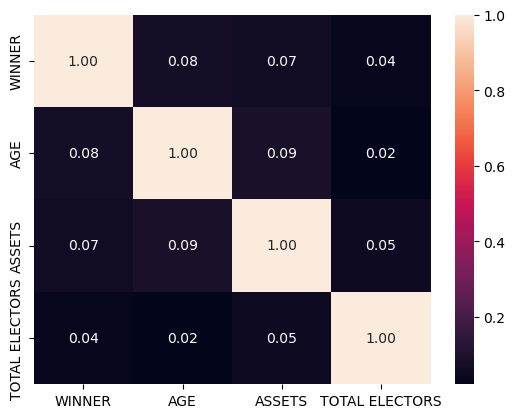

In [53]:
numeric_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_copy[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

In [54]:
cov = (df.T @ df) / (df.shape[0] - 1)
cov = np.array(cov, dtype=float)
eig_values, eig_vectors = np.linalg.eig(cov)
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]
sorted_eig_vectors

array([[-3.13179447e-03+0.j, -5.22525263e-03+0.j, -4.76017739e-02+0.j,
        ..., -3.31199682e-16+0.j,  6.39344711e-16+0.j,
         6.06191754e-15+0.j],
       [-2.10102244e-02+0.j, -9.99237579e-01+0.j,  3.03277413e-02+0.j,
        ..., -6.30587280e-18+0.j,  3.05211129e-17+0.j,
        -3.99420717e-17+0.j],
       [-1.98744808e-02+0.j, -9.20122439e-03+0.j, -1.64932269e-01+0.j,
        ..., -3.89332771e-16+0.j,  2.04616640e-15+0.j,
         1.74307680e-15+0.j],
       ...,
       [-1.75173309e-03+0.j, -1.62961142e-03+0.j, -1.45492146e-02+0.j,
        ..., -1.53759065e-01+0.j,  5.61698015e-02+0.j,
        -4.28342482e-02+0.j],
       [-7.44061197e-05+0.j,  5.18044197e-05+0.j, -2.02304078e-03+0.j,
        ..., -1.46273319e-01+0.j,  4.59614379e-02+0.j,
        -2.39366073e-02+0.j],
       [-1.01318512e-03+0.j, -1.44706728e-03+0.j, -1.82324184e-02+0.j,
        ..., -1.68017663e-01+0.j,  5.77001473e-02+0.j,
        -3.44818937e-02+0.j]])

In [55]:
cov = (df.T @ df) / (df.shape[0] - 1)
cov = np.array(cov, dtype=float)
eig_values, eig_vectors = np.linalg.eig(cov)

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_13980\507399433.py:8: MatplotlibDeprecationWarning:

Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



(1.0, 4.0)

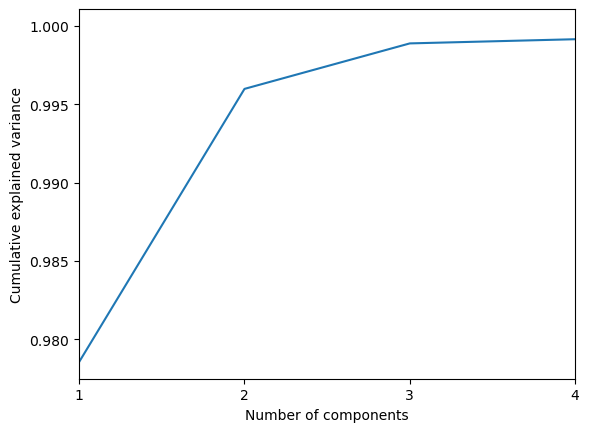

In [56]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [57]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['WINNER']]], axis = 1)

In [58]:
pca.explained_variance_ratio_.sum()

0.990231343713765

In [59]:
x=finalDf.drop(['WINNER'],axis=1)
y=finalDf['WINNER']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [60]:
rs=51
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
rf=RandomForestClassifier(n_estimators=150, criterion='gini')
xgbc=XGBClassifier(objective = 'binary:logistic',eval_metric='error')

In [61]:
def get_scores(model):
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  return {'Accuracy':accuracy_score(y_test,pred),'roc_auc_score':roc_auc_score(y_test,pred)}

In [62]:
get_scores(lr)

{'Accuracy': 0.7194388777555111, 'roc_auc_score': 0.49313186813186816}

In [63]:
get_scores(knn)

{'Accuracy': 0.7955911823647295, 'roc_auc_score': 0.7713471713471712}

In [64]:
get_scores(rf)

{'Accuracy': 0.8156312625250501, 'roc_auc_score': 0.7827533577533579}

In [65]:
get_scores(xgbc)

{'Accuracy': 0.8216432865731463, 'roc_auc_score': 0.7798840048840049}

In [66]:
def tuning(model,params):
   model_cv=GridSearchCV(model,scoring='accuracy',param_grid=params)
   scores=get_scores(model_cv)
   print('Mean cross-validated score of the best_estimator:',model_cv.best_score_)
   print('Accuracy:',scores['Accuracy'])
   print('roc_auc_score:',scores['roc_auc_score'])
   return model_cv

In [67]:
params={
    'n_estimators':[100,150,175,200,250],
    'max_depth':[4,5,6],
    'criterion':['gini','entropy']
}
rf_cv=tuning(rf,params)

Mean cross-validated score of the best_estimator: 0.8296477146042364
Accuracy: 0.8076152304609219
roc_auc_score: 0.7423076923076923


In [68]:
params = [{
    'C' : [0.01,0.1,0.5,1],
    'max_iter' : [100,150,200]
    }
]
lr_cv=tuning(lr,params)

Mean cross-validated score of the best_estimator: 0.715422519509476
Accuracy: 0.7194388777555111
roc_auc_score: 0.49313186813186816


In [69]:
params = [
    {
      'weights':['uniform','distance'],
      'n_neighbors':[3,5,7,9]
    }
]
knn_cv=tuning(knn,params)

Mean cross-validated score of the best_estimator: 0.8309765886287626
Accuracy: 0.8076152304609219
roc_auc_score: 0.7702686202686203


In [70]:
params = [
    {
      'n_estimators':[150,200,300],
      'learning_rate':[0.01,0.1,1.0],
      'max_depth':[4,6]
    }
]
xgb_cv=tuning(xgbc,params)

Mean cross-validated score of the best_estimator: 0.834989966555184
Accuracy: 0.8156312625250501
roc_auc_score: 0.7547924297924298


In [71]:
xgb_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}

In [72]:
bagging_knn = BaggingClassifier(knn_cv,n_estimators=100,bootstrap=True,oob_score=True,random_state=rs)

In [73]:
get_scores(bagging_knn)

{'Accuracy': 0.8016032064128257, 'roc_auc_score': 0.7754680504680505}

In [74]:
bagging_knn.oob_score_

0.8216432865731463

In [75]:
adb=AdaBoostClassifier(n_estimators=200,random_state=rs)

In [76]:
get_scores(adb)

{'Accuracy': 0.8136272545090181, 'roc_auc_score': 0.7673992673992673}

In [77]:
final_model=xgbc
final_pred=final_model.predict(x_test)

In [78]:
roc_auc_score(y_test,final_pred)

0.7798840048840049

In [79]:
accuracy_score(y_test,final_pred)

0.8216432865731463

.

.

.

.

.

**3. Confusion Matrix**

In [117]:
cf_matrix=confusion_matrix(y_test,final_pred)

In [118]:
cf_matrix

array([[324,  40],
       [ 50,  85]])

<Axes: >

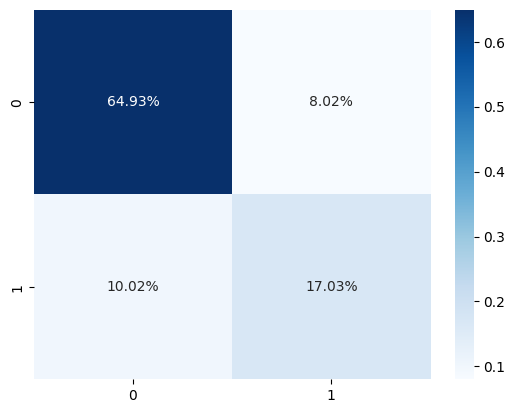

In [119]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

.

.

**4. F1 Score**

In [120]:
f1_score(y_test,final_pred,average=None)

array([0.87804878, 0.65384615])

**We can also use Cross val score to train and test on whole dataset by doing K-Folds while in train_test_split we don't do folds.**

In [121]:
from sklearn.model_selection import cross_val_predict,cross_val_score
roc_scores=cross_val_score(final_model, x, y, cv=5,scoring='roc_auc')
roc_scores.mean()

0.7210187705918625

In [122]:
accuracy_scores=cross_val_score(final_model, x, y, cv=5,scoring='accuracy')
accuracy_scores.mean()

0.7680250626566416

In [123]:
f1_scores=cross_val_score(final_model, x,y, cv=5,scoring='f1')
f1_scores.mean()

0.5136481987069138